In [1]:
import pandas as pd
import numpy as np
import quantstats as qs
import yfinance as yf
import matplotlib.pyplot as plt

### 1 - Selecionando e Capturando dados das Empresas

Selecionando as maiores pagadoras de dividendos da época pela revista money times - https://www.moneytimes.com.br/as-20-acoes-que-mais-pagaram-dividendos-na-decada/

- 1º  Taesa	TAEE11	12,43
- 2º	Cemig	CMIG4	9,09
- 3°	Comgás	CGAS5	7,99
- 4º	Vivo	VIVT3	7,6
- 5º	Copel	CPLE3	7,11
- 6º	Ferbasa	FESA4	6,6
- 7°	Santander	SANB4	6,24
- 8º	Sanepar	SAPR3	6,15
- 9º	Trans. Paulista	TRPL4	6,11
- 10º	Banco do Brasil	BBAS3	6

In [2]:
tickers = ['TAEE11.SA', 'CMIG4.SA', 'CGAS5.SA', 'VIVT3.SA', 'CPLE3.SA', 
           'FESA4.SA', 'SANB4.SA', 'SAPR3.SA', 'TRPL4.SA', 'BBAS3.SA']

# Obtenha os dados históricos de fechamento ajustado para os tickers
data = yf.download(tickers, start='2018-01-08')['Adj Close']

data.head()

[*********************100%%**********************]  10 of 10 completed


,BBAS3.SA,CGAS5.SA,CMIG4.SA,CPLE3.SA,FESA4.SA,SANB4.SA,SAPR3.SA,TAEE11.SA,TRPL4.SA,VIVT3.SA
Date,,,,,,,,,,
2018-01-08,11.141899,37.551620,1.885197,1.348997,4.591888,9.334180,3.070182,11.103161,8.921716,26.253895
2018-01-09,11.036263,37.206459,1.846668,1.334784,4.609967,9.288233,2.855982,10.898421,8.979451,26.183756
2018-01-10,10.990039,37.224308,1.874189,1.351582,4.600927,9.367002,2.915482,10.751433,8.935463,25.852154
2018-01-11,11.240939,37.742054,1.912718,1.348351,4.620813,9.445772,2.789342,10.672683,8.807617,26.891588
2018-01-12,11.267354,37.843224,1.893454,1.337368,4.843175,9.255411,2.748883,10.672683,8.947834,26.649271


### 2 - Calculando Retorno do Portifólio

- Selecionamos um peso para cada empresa: 10% para cada
- Calculamos o retorno com a multiplicação de um vetor de pesos x vetor de retornos de cada ativo 


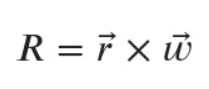

In [3]:
# Vetor de PEsos - 10% para cada empresa
w = [0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10]

In [4]:
# Vetor de resultados - diferença em relação a data anterior
r = data.pct_change()
r

,BBAS3.SA,CGAS5.SA,CMIG4.SA,CPLE3.SA,FESA4.SA,SANB4.SA,SAPR3.SA,TAEE11.SA,TRPL4.SA,VIVT3.SA
Date,,,,,,,,,,
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,-0.009481,-0.009192,-0.020438,-0.010536,0.003937,-0.004922,-0.069768,-0.018440,0.006471,-0.002672
2018-01-10,-0.004188,0.000480,0.014903,0.012585,-0.001961,0.008481,0.020833,-0.013487,-0.004899,-0.012664
2018-01-11,0.022830,0.013909,0.020558,-0.002390,0.004322,0.008409,-0.043265,-0.007325,-0.014308,0.040207
2018-01-12,0.002350,0.002681,-0.010072,-0.008146,0.048122,-0.020153,-0.014505,0.000000,0.015920,-0.009011
...,...,...,...,...,...,...,...,...,...,...
2024-07-08,-0.016461,-0.050195,0.016393,0.009249,0.012761,-0.022222,-0.005814,-0.006623,-0.000741,0.002154
2024-07-09,-0.003423,0.071059,-0.002846,0.019473,0.019473,0.002841,0.007797,0.005507,0.014095,0.005159
2024-07-10,0.015649,-0.061094,-0.004757,0.001124,0.000000,0.032578,-0.007737,0.005765,0.006584,0.014756


In [5]:
# Retornos de Portfolio
retorno = np.dot(r, w)
retorno_portifolio = pd.DataFrame(retorno, columns = ['Retorno Portifolio'])
retorno_portifolio.index = r.index
retorno_portifolio

,Retorno Portifolio
Date,
2018-01-08,NaN
2018-01-09,-0.013504
2018-01-10,0.002008
2018-01-11,0.004295
2018-01-12,0.000719
...,...
2024-07-08,-0.006150
2024-07-09,0.013913
2024-07-10,0.000287


In [6]:
retorno_cumulativo_carteira = np.cumprod(retorno_portifolio[1:] + 1)-1
retorno_cumulativo_carteira

#Note que o retorno foi de 248%

,Retorno Portifolio
Date,
2018-01-09,-0.013504
2018-01-10,-0.011523
2018-01-11,-0.007278
2018-01-12,-0.006564
2018-01-15,-0.000454
...,...
2024-07-08,2.411989
2024-07-09,2.459462
2024-07-10,2.460454


In [7]:
# Calculando retorno do ibovespa

tickers = ['^BVSP']
ibov = yf.download(tickers, start='2018-01-08')['Adj Close']
ibov = pd.DataFrame(ibov)

# Renomear a coluna 'Adj Close' para 'IBOV'
ibov.rename(columns={'Adj Close': 'IBOV'}, inplace=True)

# Calcular o retorno diário do IBOV
retorno_ibov = ibov.pct_change()

# Calcular o retorno total acumulado do IBOV
ibov_retorno_total = (1 + retorno_ibov).prod() - 1

print(ibov_retorno_total)



[*********************100%%**********************]  1 of 1 completed
IBOV    0.623817
dtype: float64


Obtemos por tanto como resultado um retorno de 248% desde 2018, contra um retorno de 62% do IBOVESPA

### 3 - Análise de Resultados

In [8]:
# Concatenando resultados IBOV x Portifolio

comparacao_retorno = pd.concat([retorno_portifolio, retorno_ibov], axis=1)
comparacao_retorno = comparacao_retorno.dropna()
comparacao_retorno

,Retorno Portifolio,IBOV
Date,,
2018-01-09,-0.013504,-0.006488
2018-01-10,0.002008,-0.008407
2018-01-11,0.004295,0.014885
2018-01-12,0.000719,-0.000202
2018-01-15,0.006151,0.005079
...,...,...
2024-07-08,-0.006150,0.002225
2024-07-09,0.013913,0.004425
2024-07-10,0.000287,0.000865


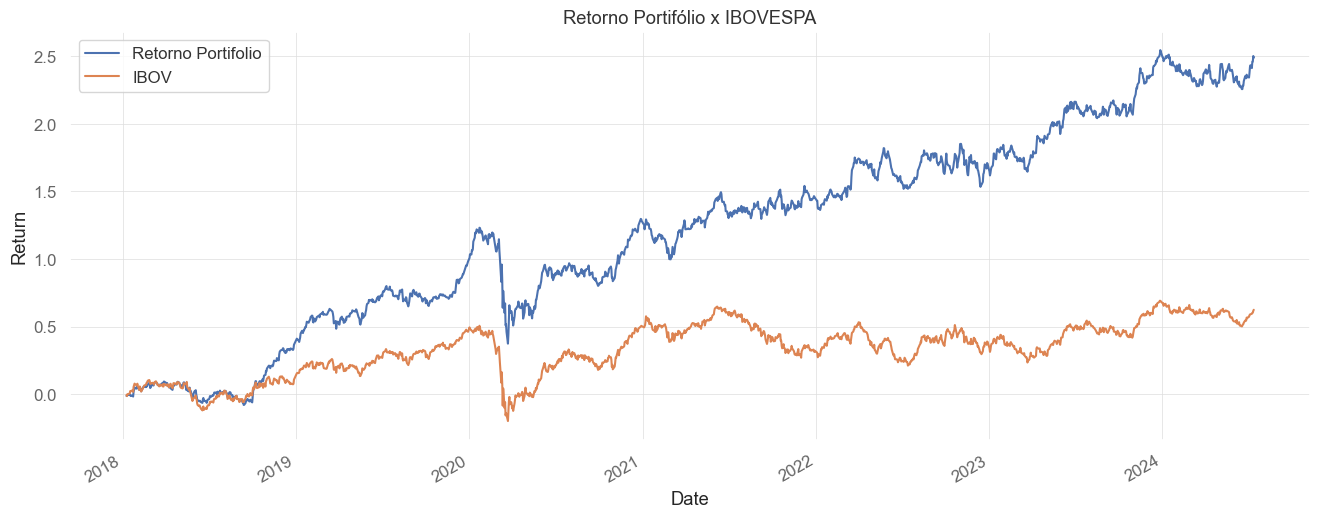

In [9]:
# Plotando resultados

portfolios_cumulative_return = np.exp(np.log1p(comparacao_retorno).cumsum()).sub(1)
portfolios_cumulative_return.plot(figsize=(16,6))
plt.title('Retorno Portifólio x IBOVESPA')
plt.ylabel('Return')

plt.show()

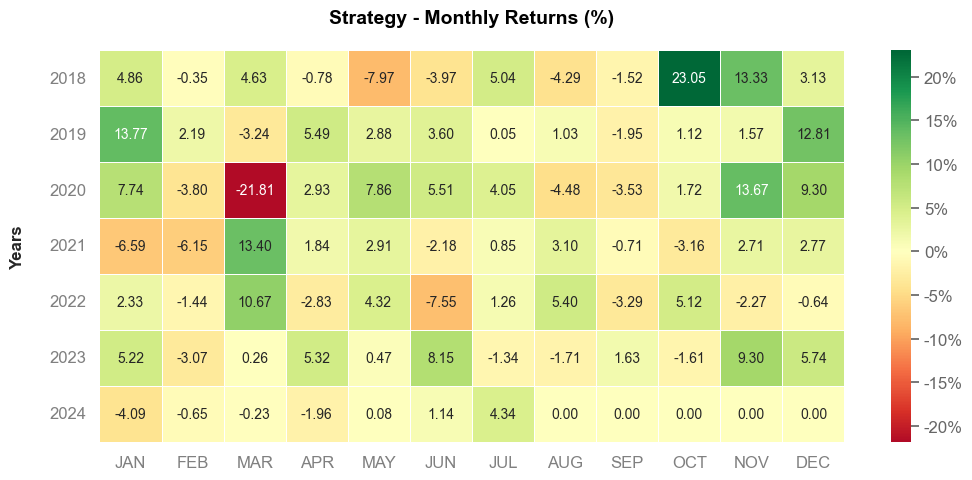

In [10]:
qs.extend_pandas()
comparacao_retorno['Retorno Portifolio'].plot_monthly_heatmap()